In [61]:
import sys, os
import pandas as pd
sys.path.append(os.path.abspath(".."))
from src.data import load_data
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
data_path = load_data()
df = pd.read_csv(data_path)


In [63]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [64]:
df.shape

(200, 5)

In [65]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [66]:
# we need only 3rd 4th col to do clustring 
X = df.iloc[: , [3,4]].values

In [67]:
X.shape

(200, 2)

In [68]:
wcss= []
for i in range( 1, 11 ):
    Kmeans= KMeans(n_clusters= i , init='k-means++' , random_state=42)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

c:\Users\kakas\anaconda3\envs\sonar_project\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kakas\anaconda3\envs\sonar_project\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kakas\anaconda3\envs\sonar_project\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kakas\anaconda3\envs\sonar_project\lib\site-packages\sklearn\cluster\_

<function matplotlib.pyplot.show(close=None, block=None)>

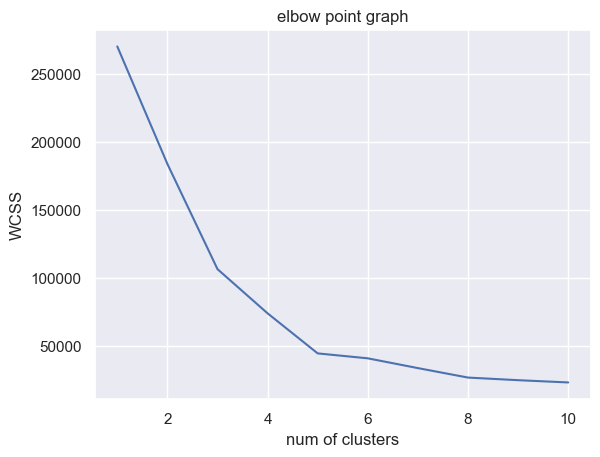

In [69]:
#based in elbow method we choose 5 as k or number of cluster 
sns.set()
plt.plot(range(1,11),wcss)
plt.title('elbow point graph')
plt.xlabel('num of clusters')
plt.ylabel('WCSS')
plt.show

In [70]:
Kmeans= KMeans(n_clusters=5 , init = 'k-means++' , random_state=0)
y=Kmeans.fit_predict(X)
print(y)    

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


c:\Users\kakas\anaconda3\envs\sonar_project\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


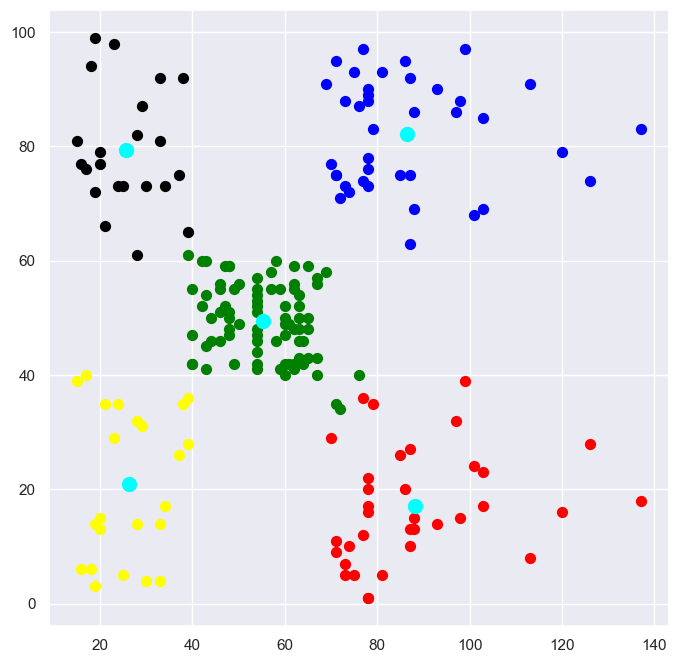

In [72]:
plt.figure(figsize=(8, 8 ))
plt.scatter(X[y == 0 , 0]  , X[y==0 , 1]  , s=50 , c='green'   ,label='Cluster 0')
plt.scatter(X[y == 1 , 0]  , X[y==1 , 1]  , s=50 ,  c='blue',label='Cluster 1')
plt.scatter(X[y == 2 , 0]  , X[y==2 , 1]  , s=50 ,  c='red' ,label='Cluster 2')
plt.scatter(X[y == 3 , 0]  , X[y==3 , 1]  , s=50 ,  c='yellow' ,label='Cluster 3')
plt.scatter(X[y == 4 , 0]  , X[y==4 , 1]  , s=50 ,  c = 'black' , label='Cluster 4')

plt.scatter(Kmeans.cluster_centers_[: , 0] , Kmeans.cluster_centers_[ : , 1 ]  , s = 100 , c='cyan' , label = 'centroids')